In [ ]:
import numpy as np # type: ignore

# Contoh data dummy (gantilah dengan data transaksi nasabah yang sebenarnya)
np.random.seed(42)
data = np.random.rand(1000, 10)  # 1000 nasabah, 10 fitur transaksi
labels = np.random.randint(0, 2, 1000)  # 0 atau 1 untuk dua segmen

# Normalisasi data
data = (data - data.mean(axis=0)) / data.std(axis=0)

# Menambahkan bias (intercept)
X = np.hstack((np.ones((data.shape[0], 1)), data))  # Tambahkan kolom bias
y = labels.reshape(-1, 1)  # Label sebagai vektor kolom

# Parameter model
num_features = X.shape[1]
weights = np.zeros((num_features, 1))  # Inisialisasi bobot dengan nol
learning_rate = 0.01
epochs = 50

# Fungsi sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Fungsi loss (binary cross-entropy)
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-10  # Untuk menghindari log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Gradient Descent untuk memperbarui bobot
losses = []
for epoch in range(epochs):
    # Forward pass
    z = np.dot(X, weights)  # Prediksi linear
    predictions = sigmoid(z)  # Aktivasi sigmoid
    
    # Hitung loss
    loss = binary_cross_entropy(y, predictions)
    losses.append(loss)
    
    # Backward pass (gradien descent)
    gradient = np.dot(X.T, (predictions - y)) / y.size
    weights -= learning_rate * gradient  # Update bobot
    
    # Output progress
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

# Hasil akhir bobot
print("Final weights:", weights.flatten())


Epoch 1/50, Loss: 0.6931
Epoch 2/50, Loss: 0.6931
Epoch 3/50, Loss: 0.6931
Epoch 4/50, Loss: 0.6930
Epoch 5/50, Loss: 0.6930
Epoch 6/50, Loss: 0.6930
Epoch 7/50, Loss: 0.6929
Epoch 8/50, Loss: 0.6929
Epoch 9/50, Loss: 0.6929
Epoch 10/50, Loss: 0.6928
Epoch 11/50, Loss: 0.6928
Epoch 12/50, Loss: 0.6927
Epoch 13/50, Loss: 0.6927
Epoch 14/50, Loss: 0.6927
Epoch 15/50, Loss: 0.6926
Epoch 16/50, Loss: 0.6926
Epoch 17/50, Loss: 0.6926
Epoch 18/50, Loss: 0.6925
Epoch 19/50, Loss: 0.6925
Epoch 20/50, Loss: 0.6925
Epoch 21/50, Loss: 0.6924
Epoch 22/50, Loss: 0.6924
Epoch 23/50, Loss: 0.6924
Epoch 24/50, Loss: 0.6923
Epoch 25/50, Loss: 0.6923
Epoch 26/50, Loss: 0.6923
Epoch 27/50, Loss: 0.6922
Epoch 28/50, Loss: 0.6922
Epoch 29/50, Loss: 0.6922
Epoch 30/50, Loss: 0.6921
Epoch 31/50, Loss: 0.6921
Epoch 32/50, Loss: 0.6921
Epoch 33/50, Loss: 0.6920
Epoch 34/50, Loss: 0.6920
Epoch 35/50, Loss: 0.6920
Epoch 36/50, Loss: 0.6919
Epoch 37/50, Loss: 0.6919
Epoch 38/50, Loss: 0.6919
Epoch 39/50, Loss: 0.

### Penjelasan Kode

1. **Fungsi Sigmoid**:
   ```python
   def sigmoid(z):
       return 1 / (1 + np.exp(-z))
   ```
   Fungsi sigmoid digunakan untuk mengkonversi nilai prediksi linear menjadi probabilitas antara 0 dan 1.

2. **Binary Cross-Entropy Loss**:
   ```python
   def binary_cross_entropy(y_true, y_pred):
       epsilon = 1e-10
       y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
       return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
   ```
   Fungsi ini menghitung seberapa baik prediksi model dibandingkan dengan label sebenarnya.

3. **Update Bobot**:
   ```python
   gradient = np.dot(X.T, (predictions - y)) / y.size
   weights -= learning_rate * gradient
   ```
   - Gradien dihitung dari derivatif loss terhadap bobot.
   - Bobot diperbarui dalam arah negatif gradien untuk mengurangi loss.

4. **Iterasi Epoch**:
   ```python
   for epoch in range(epochs):
       # Forward pass, backward pass, update weights
   ```
   Model melakukan iterasi selama jumlah epoch yang ditentukan. Pada setiap epoch, loss dihitung, dan bobot diperbarui untuk meningkatkan akurasi dan menurunkan loss.

---


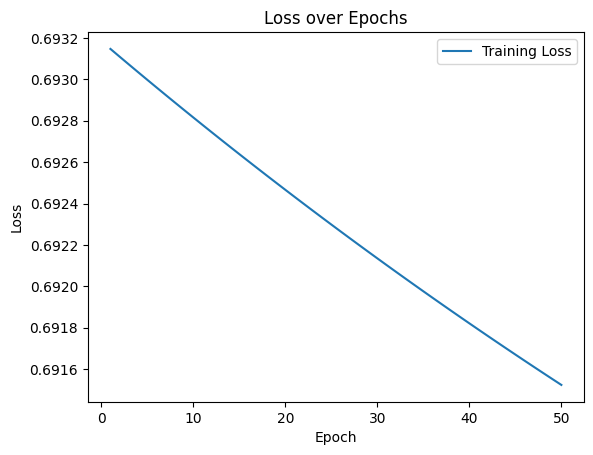

In [2]:
import matplotlib.pyplot as plt

plt.plot(range(1, epochs + 1), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()
